#第7章
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

**Gensimを使う**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/nlp100/'

#60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
# !gunzip /content/drive/MyDrive/nlp100/GoogleNews-vectors-negative300.bin.gz

In [ ]:
import gensim

word = "United_States"
model_path = '/content/drive/MyDrive/nlp100/GoogleNews-vectors-negative300.bin'

w2v = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)
w2v[word]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

#61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
print(w2v.similarity(word, "U.S."))

0.73107743


#62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
print(w2v.most_similar(word, topn=10))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370391845703), ('United_Sates', 0.74007248878479), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019070148468018)]


#63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
print(w2v.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10))

[('Greece', 0.6898481249809265), ('Aristeidis_Grigoriadis', 0.5606848001480103), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862693786621), ('Hrysopiyi_Devetzi', 0.5248444676399231), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166866183280945), ('Iraklion', 0.5146791934967041)]


#64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
test_path = path + "questions-words.txt"
with open(test_path, "r") as fin, open(test_path.replace(".txt", ".result.txt"), "w") as fout:
    for line in fin:
        word_list = line.strip().split(' ')
        if len(word_list) != 4: # 文頭の説明文をスキップ
            head = line.strip()
        else:
            most_similar_word, most_similar_vec = w2v.most_similar(positive=[word_list[1], word_list[2]], negative=[word_list[0]])[0]
            fout.write(head + "\t" + line.strip() + "\t" + most_similar_word + "\t" + str(most_similar_vec) + "\n")
            

#65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

* カテゴリ名がgramから始まるものが文法的アナロジーの評価データ
* それ以外のカテゴリが意味的アナロジー

https://mori-memo.hateblo.jp/entry/2022/09/27/114404

In [ ]:
result_path = path + "questions-words.result.txt"
syntactic_acc = 0
syntactic_cnt = 0
semantic_acc = 0
semantic_cnt = 0

with open(result_path, "r") as f:
    for line in f:
        words = line.split("\t") # head, 4word, most_similar_word, most_similar_vec

        src = words[2] # most_similar_word
        tgt = words[1].split(" ")[3] # word[3]

        if line.startswith(': gram'):
            if src == tgt:
                syntactic_acc += 1
            syntactic_cnt += 1

        elif line.startswith(':'):
            if src == tgt:
                semantic_acc += 1
            semantic_cnt += 1

print("意味的アナロジー：", float(semantic_acc)/semantic_cnt)
print("文法的アナロジー：", float(syntactic_acc)/syntactic_cnt)

意味的アナロジー： 0.7308602999210734
文法的アナロジー： 0.7400468384074942


#66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!unzip /content/drive/MyDrive/nlp100/wordsim353.zip

Archive:  /content/drive/MyDrive/nlp100/wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [ ]:
from scipy.stats import spearmanr

ws353_path = "combined.csv"

vec = []
human = []
ws353 = pd.read_csv(filepath_or_buffer=ws353_path, sep=",")

for i in range(len(ws353)):
    vec.append(w2v.similarity(ws353["Word 1"][i], ws353["Word 2"][i])) # 単語ベクトル
    human.append(ws353["Human (mean)"][i]) # 人手評価

correlation, pvalue = spearmanr(human, vec)
print("スピアマン相関係数 : ", correlation)

スピアマン相関係数 :  0.7000166486272194


#67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

[0 3 0 2 3 0 1 1 0 3 1 3 1 2 1 4 1 1 3 2 2 1 3 2 0 3 3 2 1 1 1 3 1 1 1 4 1
 2 3 4 3 4 2 3 1 3 4 1 3 1 4 4 1 0 0 1 2 1 1 2 1 2 0 3 4 1 1 1 3 1 3 1 3 4
 4 0 1 0 2 3 2 1 1 0 4 1 2 1 3 1 3 3 4 2 1 2 2 1 1 4 4 2 0 1 1 1 0 1 4 0 4
 2 3 2 0 2 3 1 4 1 0 2 3 2 1 0 2 4 3 3 0 1 3 1 1 4 0 3 1 3 3 2 0 3 3 3 1 4
 1 4 1 4 3 1 0 2 3 1 3 3 0 3 1 3 1 2 1 2 1 0 4 2 4 4 4 2 1 1 1 1 0 4 4 1 2
 2 4 1 2 0 2 2 1 4 3 3 2 2 1 2 0 1 4 2 4 1 1 0 4 1 2 2 3 1 2 1 4 2 2 3 1 4
 1 2 1 1 4 0 2 1 0 4]



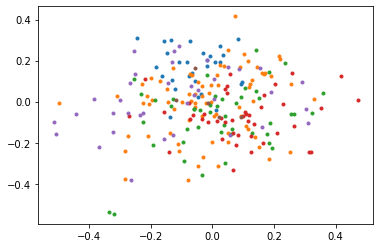

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

word_category = [': capital-common-countries', ': capital-world']

countries = set()

with open(result_path, "r") as f:
    for line in f:
        words = line.split("\t") # head, 4word, most_similar_word, most_similar_vec
        if words[0] in word_category:
            countries = countries.union(set(words[1].split(" ")))

countries_vec = [w2v[country] for country in countries]

# クラスタリング
countries_vec_array = np.array(countries_vec)
cls = KMeans(n_clusters=5, init='random', random_state=0)
pred = cls.fit_predict(countries_vec_array)
print(pred)
print()


# 結果とセントロイドの位置を確認
center = cls.cluster_centers_
for i in range(5):
    labels = countries_vec_array[pred == i]
    plt.scatter(labels[:,0],labels[:,1], marker=".")
plt.scatter(center[:,0],center[:,1],marker=".")
plt.show()

#68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

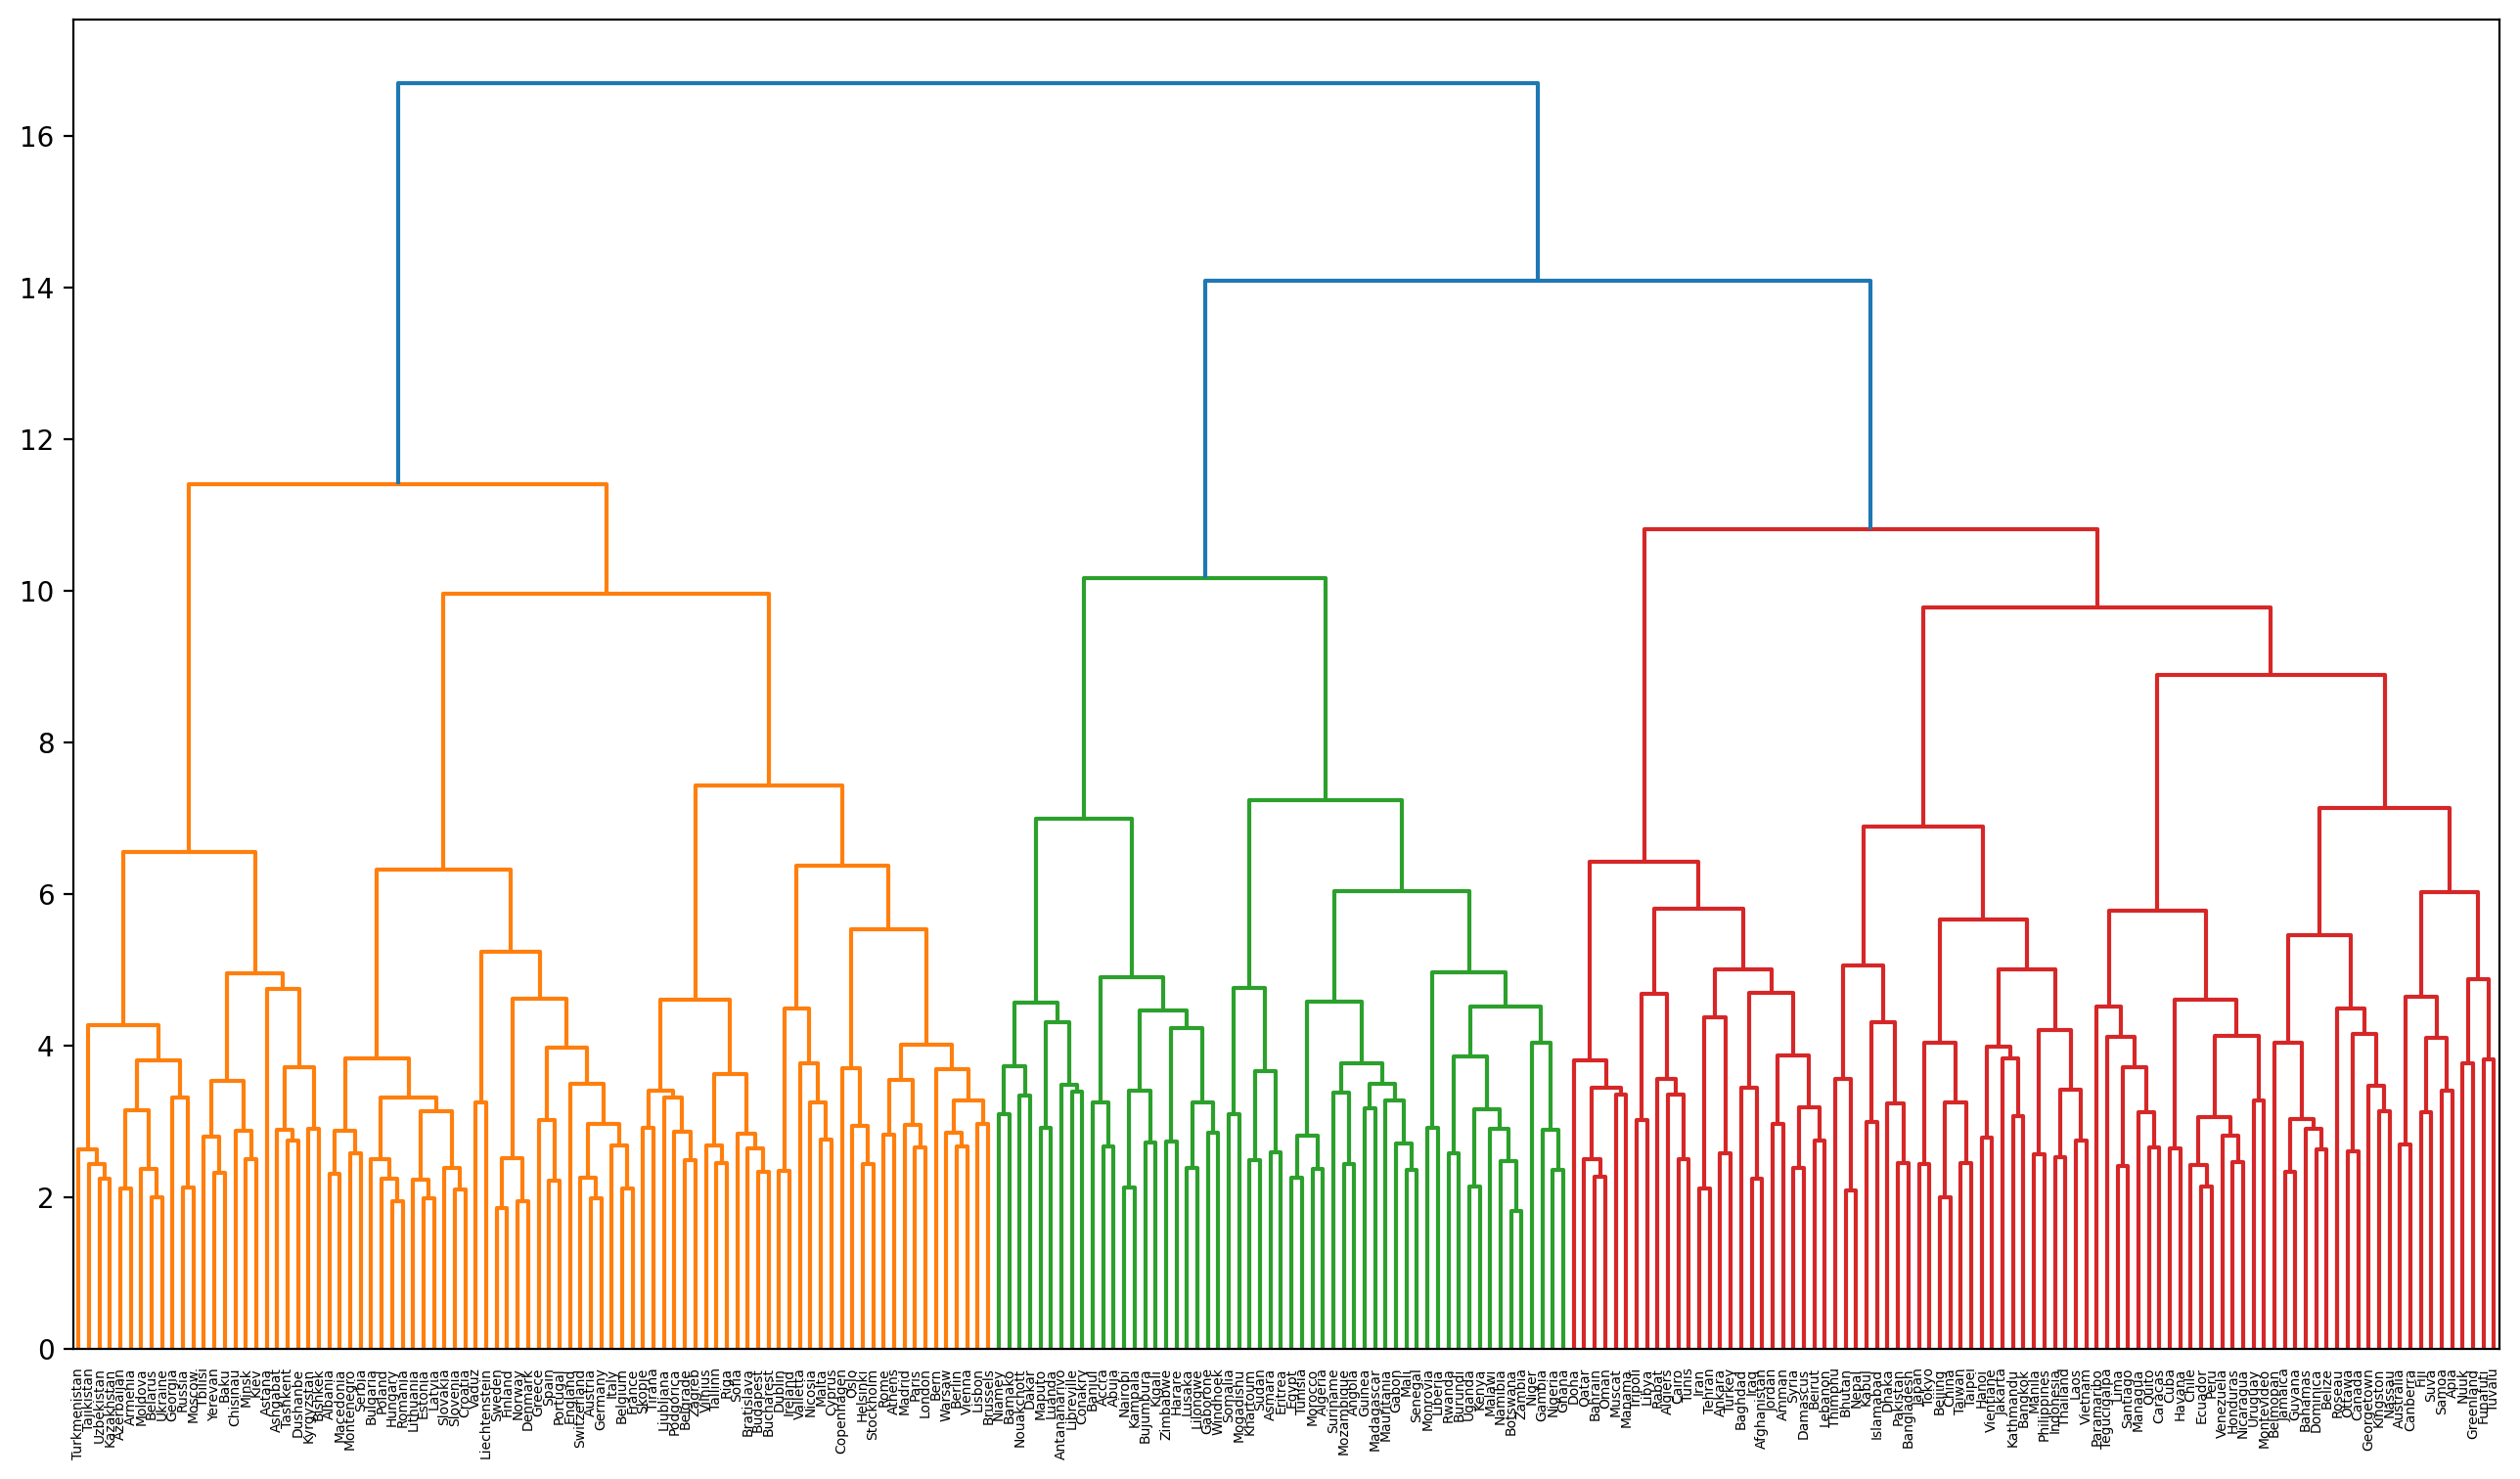

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(countries_vec, method='ward')
plt.figure(figsize=(16, 9), dpi=200)
dendrogram(linkage_result, labels=list(countries))
plt.show()

#69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [ ]:
!pip install japanize-matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=0f3d66fef9167d124c61eef7148bb6e2fb7ca41b4a84f1155fca7f4865e6e3aa
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


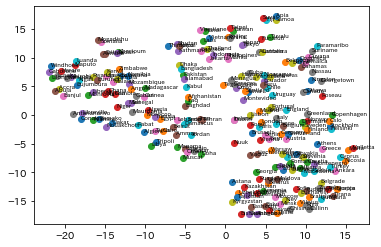

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import japanize_matplotlib

tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000) # 2次元で可視化
tsne_result = tsne.fit_transform(countries_vec_array)

tsne_results=pd.DataFrame(tsne_result, columns=['x', 'y'])

for x, y, label in zip(tsne_results["x"], tsne_results["y"], list(countries)):
    plt.scatter(x, y, label=label)
    plt.text(x, y, label, fontsize=6)
plt.show()

In [ ]:
tsne_results

,x,y
0,-18.535387,5.204551
1,15.284752,-6.020445
2,-13.344110,11.032269
3,1.014473,-4.874808
4,10.994806,-8.516038
...,...,...
227,-19.741158,6.370500
228,7.458050,-14.878214
229,4.759596,7.022997
230,-10.106794,-3.044584
